#Project Name - Mobile Phone price range prediction

Project type - Classification
Contribution - Individual

#Project Summary

In the fiercely competitive mobile phone market, it's essential for companies to understand what drives the prices of mobile phones. By examining sales data, businesses can pinpoint the key features that affect pricing and adjust their strategies accordingly. The data_mobile_price_range.csv dataset offers a valuable resource for exploring these relationships. This dataset includes various features of mobile phones, such as RAM, internal memory, battery power, and other specifications, along with a categorical variable that indicates the phone's price range. The goal here is not to predict the exact price but to classify the phones into different price ranges, helping to identify which features have the most significant impact on the price category.
Dataset Overview

The dataset comprises 2000 entries with 21 columns, each representing a specific attribute of the mobile phones. Some columns are:

  battery_power: Total energy storage capacity of the battery (mAh).

  blue: Bluetooth support (0: No, 1: Yes).

  clock_speed: Speed of the microprocessor (GHz).

  dual_sim: Dual SIM support (0: No, 1: Yes).

Analysis and Model Building - To understand the relationship between the features and the price range, we use a Random Forest classifier. This model is well-suited for this task as it can handle the high dimensionality of the data and provide insights into feature importance

#Lets Begin

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
df= pd.read_csv('/content/drive/MyDrive/Data/data_mobile_price_range.csv')

In [ ]:
#top 5 rows
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Display the shape of the dataset
df.shape

(2000, 21)

In [ ]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#Nature of the problem

The primary objective is to categorize mobile phones into different price ranges based on their features. This is a classification problem, and Random Forest is a powerful and widely used algorithm for classification tasks.

#Characteristics of the Dataset

**Numerical and Categorical Features**: The dataset contains a mix of numerical features (e.g., battery_power, ram, clock_speed) and categorical features (e.g., blue, dual_sim). **Random Forest** can handle both types effectively.

**Multiclass Target Variable**: The target variable, price_range, has four classes (0: low cost, 1: medium cost, 2: high cost, 3: very high cost). Random Forest is well-suited for multiclass classification problems.

In [ ]:
# Split the data into features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Make predictions
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



The Random Forest model has an accuracy of 89.25%. This indicates that the model correctly classifies approximately 89 out of 100 instances of mobile price range.

#Metrics_description

**Precision:**
Precision measures how many of the predicted positive instances are actually positive. For example, a precision of 0.95 for class 0 means that 95% of the instances predicted as class 0 are indeed class 0.

Class 0 (Low cost): 0.95

Class 1 (Medium cost): 0.89

Class 2 (High cost): 0.78

Class 3 (Very high cost): 0.94

**Recall:**
Recall measures how many of the actual positive instances are correctly predicted by the model. For example, a recall of 0.96 for class 0 means that 96% of the actual
class 0 instances are correctly identified.

Class 0: 0.96

Class 1: 0.87

Class 2: 0.87

Class 3: 0.87

**F1-Score:**
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. Higher values indicate better performance.

Class 0: 0.96

Class 1: 0.88

Class 2: 0.82

Class 3: 0.90

In [ ]:
# Calculate feature importance
feature_importances = clf.feature_importances_
feature_names = X.columns

In [ ]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

#Feature Importance

In [ ]:
feature_importance_df.head(10)

,feature,importance
13,ram,0.470962
0,battery_power,0.074796
11,px_height,0.058538
12,px_width,0.056722
8,mobile_wt,0.041434
6,int_memory,0.037928
16,talk_time,0.032441
10,pc,0.030745
2,clock_speed,0.029058
14,sc_h,0.028447




The model identifies several features as important for predicting the price range of mobile phones. The top three most important features are:

**RAM:** This is the most critical feature, with an importance score of 0.471. It makes sense, as the amount of RAM is often a key determinant of a phone's performance and price.

**Battery Power:** With an importance score of 0.075, the battery capacity is another significant factor, as larger batteries typically correspond to more expensive phones.

**Pixel Resolution (Height and Width):** The resolution of the display also plays a crucial role in determining the price range, with importance scores of 0.059 and 0.057 for height and width, respectively.

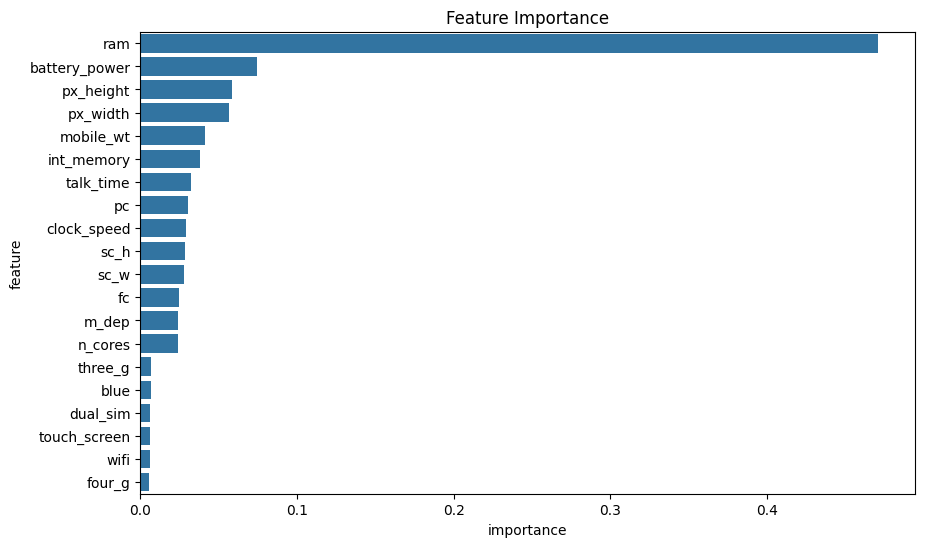

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

The plot illustrates the importance of each feature, with RAM being the most influential by a large margin. Other notable features include battery power, pixel resolution, and internal memory, which all contribute to the model's ability to accurately classify the price range of mobile phones.

#Conclusion

By analyzing the dataset data_mobile_price_range.csv, we can conclude that certain features like RAM, battery power, and pixel resolution significantly influence the price range of mobile phones. Understanding these relationships helps companies make informed decisions about product development and marketing strategies. The insights gained from this analysis can guide companies in designing phones that meet market demands while optimizing costs and pricing strategies.